# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.156583e+01     1.500207e+01
 * time: 0.004249095916748047
     1     6.311554e+01     8.754555e+00
 * time: 0.012165069580078125
     2     5.710918e+01     1.012141e+01
 * time: 0.15015101432800293
     3     4.054669e+01     8.242492e+00
 * time: 0.1802690029144287
     4     2.879143e+01     7.129811e+00
 * time: 0.20710515975952148
     5     1.903574e+01     4.213820e+00
 * time: 0.22935914993286133
     6     1.249731e+01     3.341004e+00
 * time: 0.2485342025756836
     7     1.017493e+01     5.380879e+00
 * time: 0.2636141777038574
     8     8.318667e+00     4.417402e+00
 * time: 0.2834510803222656
     9     7.015758e+00     1.808427e+00
 * time: 0.3033151626586914
    10     6.480651e+00     2.027196e+00
 * time: 0.31880617141723633
    11     6.043088e+00     1.327299e+00
 * time: 0.33446621894836426
    12     5.866932e+00     1.366705e+00
 * time: 0.41915011405944824
    13     5.808822e+00     1.507929e+00
 * time: 0.

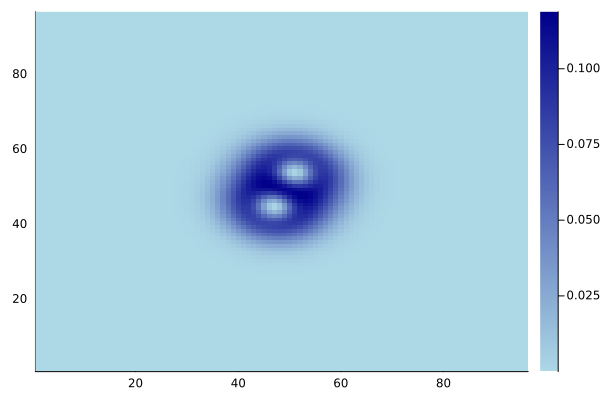

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)